**Ragavendran A**
**212222230114**

In [43]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
X_train.shape

(60000, 28, 28)

In [46]:
X_test.shape

(10000, 28, 28)

In [47]:
single_image= X_train[0]

In [48]:
single_image.shape

(28, 28)

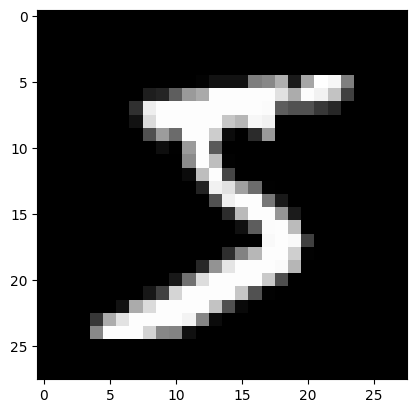

In [49]:
plt.imshow(single_image,cmap='gray')

In [50]:
y_train.shape

(60000,)

In [51]:
X_train.max()



255

In [52]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [53]:
X_train_scaled.min()

0.0

In [54]:
X_train_scaled.max()

1.0

In [55]:
y_train[0]

5

In [56]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [57]:
type(y_train_onehot)

numpy.ndarray

In [58]:
y_train_onehot.shape

(60000, 10)

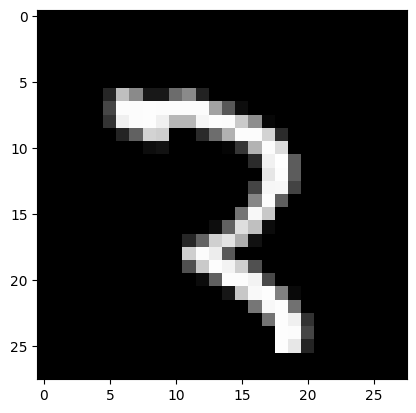

In [59]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [60]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [61]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [62]:
model = keras.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [63]:
print("Ragavendran A 212222230114")
model.summary()

Ragavendran A 212222230114
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.

In [64]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
print("Ragavendran A 212222230114")
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Ragavendran A 212222230114
Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0464 - val_accuracy: 0.9849
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.0454 - val_accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0524 - val_accuracy: 0.9840
Epoch 4/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0557 - val_accuracy: 0.9853
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0508 - val_accuracy: 0.9861


In [67]:
metrics = pd.DataFrame(model.history.history)

In [68]:
print("Ragavendran A 212222230114")
metrics.head()

Ragavendran A 212222230114


,loss,accuracy,val_loss,val_accuracy
0,0.021365,0.993333,0.046403,0.9849
1,0.016846,0.995133,0.045410,0.9859
2,0.012707,0.996383,0.052373,0.9840
3,0.010642,0.996500,0.055713,0.9853
4,0.008247,0.997500,0.050755,0.9861


Ragavendran A 212222230114


<Axes: >

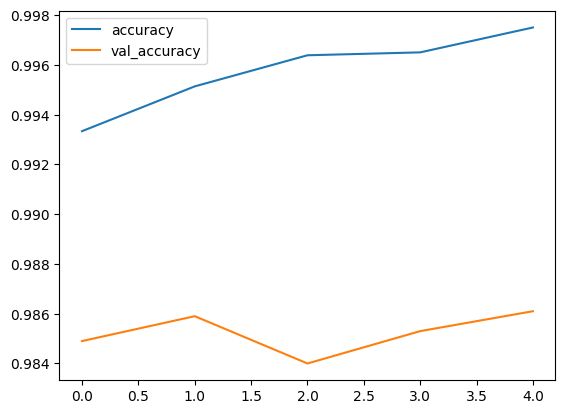

In [69]:
print("Ragavendran A 212222230114")
metrics[['accuracy','val_accuracy']].plot()

Ragavendran A 212222230114


<Axes: >

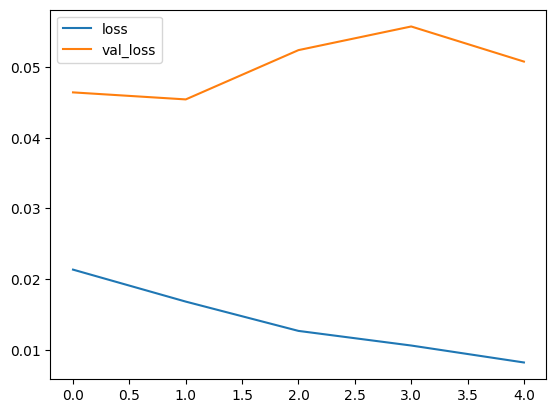

In [71]:
print("Ragavendran A 212222230114")
metrics[['loss','val_loss']].plot()

In [74]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [75]:
print("Ragavendran A 212222230114")
print(confusion_matrix(y_test,x_test_predictions))

Ragavendran A 212222230114
[[ 972    0    4    0    0    1    1    1    1    0]
 [   0 1124    6    0    0    1    1    2    1    0]
 [   1    0 1023    0    1    0    1    5    1    0]
 [   0    0    3  994    0    9    0    1    2    1]
 [   0    0    3    0  969    0    2    1    0    7]
 [   0    0    1    7    0  881    3    0    0    0]
 [   5    2    1    0    1    2  946    0    1    0]
 [   0    0    7    2    0    0    0 1017    1    1]
 [   5    0    8    1    0    2    2    4  951    1]
 [   2    0    0    4    6    2    0    6    5  984]]


In [76]:
print("Ragavendran A 212222230114")
print(classification_report(y_test,x_test_predictions))

Ragavendran A 212222230114
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [77]:
img = image.load_img('/content/22.png')

In [78]:
print("Ragavendran A 212222230114")
type(img)

Ragavendran A 212222230114


PIL.Image.Image

In [79]:
img = image.load_img('22.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [80]:
print("Ragavendran A 212222230114")
print(x_single_prediction)

Ragavendran A 212222230114
[7]


Ragavendran A 212222230114


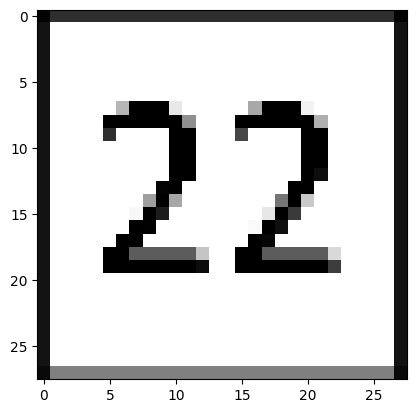

In [81]:
print("Ragavendran A 212222230114")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [82]:
print("Ragavendran A 212222230114")
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

Ragavendran A 212222230114


In [83]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [84]:
print(x_single_prediction)

[7]
